# Intro

## Load

### Standards

In [1]:
import os, sys, pickle
import numpy as np
from tqdm.notebook import trange, tqdm
import re

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1


### Homemade modules

In [3]:
from tesste import tesste
from ppp import ppp
from readers_and_converters import file2text, text2dict, text2vec

## Stoopid infos

In [4]:
L_SDGS=17

# Energy

## Folders

In [5]:
main_folder='./chatgpt_summaries/'

In [6]:
e_folder=main_folder+'Energy/'

In [7]:
ec_folders=os.listdir(e_folder)
ec_folders.sort()

In [8]:
ec_folders

['01_shell',
 '02_BP',
 '03_Harbour_Energy_PLC',
 '04_energeans',
 '05_ITHACA_ENERGY_PLC',
 '06_LSE_WG',
 '07_SERICA_ENERGY_PLC',
 '08_ASHTEAD_TECHNOLOGY_HOLDINGS_PLC',
 '10_DIVERSIFIED_ENERGY_COMPANY_PLC']

## Basics

In [9]:
energy_texts={}
for y in range(2015, 2024):
    energy_texts[str(y)]={}

In [10]:
for i, ec_folder in enumerate(tqdm(ec_folders)):
    files=os.listdir(e_folder+ec_folder)
    files.sort()
    for file in tqdm(files, desc=ec_folder, leave=False):
        year=file[:4]
        #print(year)
        energy_texts[year][ec_folder]=file2text(e_folder+ec_folder+'/'+file)
    

  0%|          | 0/9 [00:00<?, ?it/s]

01_shell:   0%|          | 0/9 [00:00<?, ?it/s]

02_BP:   0%|          | 0/9 [00:00<?, ?it/s]

03_Harbour_Energy_PLC:   0%|          | 0/2 [00:00<?, ?it/s]

04_energeans:   0%|          | 0/6 [00:00<?, ?it/s]

05_ITHACA_ENERGY_PLC:   0%|          | 0/2 [00:00<?, ?it/s]

06_LSE_WG:   0%|          | 0/5 [00:00<?, ?it/s]

07_SERICA_ENERGY_PLC:   0%|          | 0/5 [00:00<?, ?it/s]

08_ASHTEAD_TECHNOLOGY_HOLDINGS_PLC:   0%|          | 0/3 [00:00<?, ?it/s]

10_DIVERSIFIED_ENERGY_COMPANY_PLC:   0%|          | 0/5 [00:00<?, ?it/s]

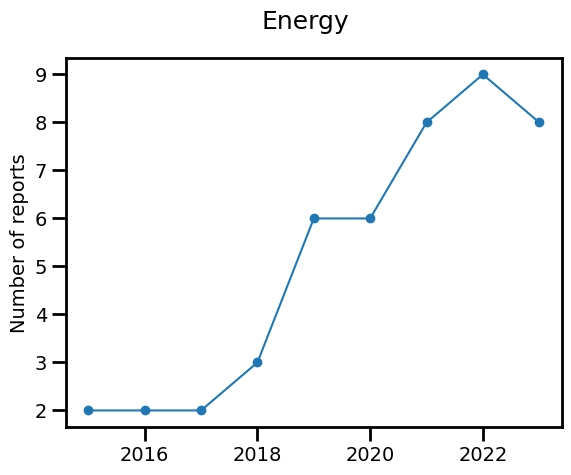

In [11]:
plt.plot(range(2015, 2024), [len(energy_texts[year].keys()) for year in energy_texts.keys()], marker='o')
plt.ylabel('Number of reports', fontsize=14)
plt.suptitle('Energy', fontsize=18)
plt.show()

## Binary analysis

In [12]:
energy_bi={}
for key in tqdm(energy_texts.keys()):
    s_keys=list(energy_texts[key].keys())
    n_docs=len(s_keys)
    aux=np.zeros((n_docs, L_SDGS), dtype=int)
    for i, s_key in enumerate(tqdm(s_keys, leave=False)):
        aux[i]=text2vec(energy_texts[key][s_key])
    energy_bi[key]=aux
    

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

In [13]:
[np.sum(np.sum(energy_bi[key], axis=0)>0) for key in energy_bi.keys()]

[15, 16, 16, 16, 17, 17, 17, 17, 17]

Not all SDGs are covered at least one time in each report.

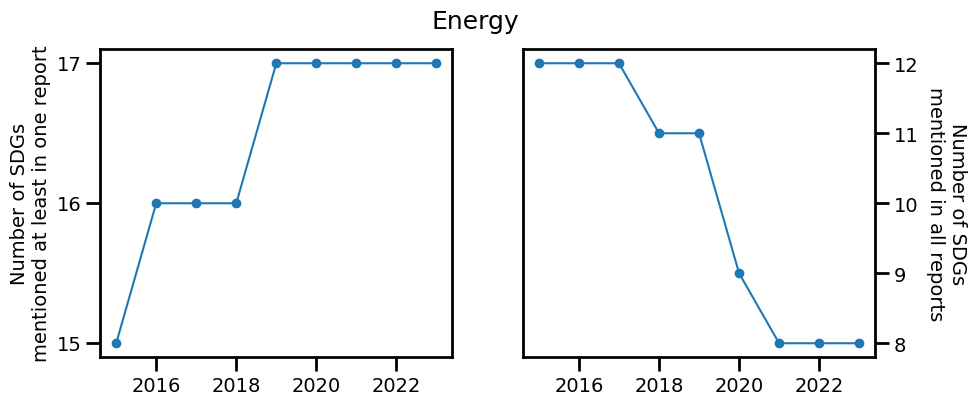

In [21]:
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axs[0].plot(range(2015, 2024), [np.sum(np.sum(energy_bi[key], axis=0)>0) for key in energy_bi.keys()], marker='o')
axs[0].set_ylabel('Number of SDGs\nmentioned at least in one report', fontsize=14)
axs[0].set_yticks(np.arange(15, 18, dtype=int))


axs[1].plot(range(2015, 2024), [np.sum(np.sum(energy_bi[key], axis=0)==energy_bi[key].shape[0]) for key in energy_bi.keys()], marker='o')
axs[1].set_ylabel('Number of SDGs\nmentioned in all reports', fontsize=14, rotation=270, labelpad=35)
axs[1].set_yticks(np.arange(8, 13, dtype=int))
axs[1].yaxis.tick_right()
axs[1].yaxis.set_label_position("right")

plt.suptitle('Energy', fontsize=18)
plt.show()

# Utilities

## Folders

In [22]:
main_folder='./chatgpt_summaries/'

In [23]:
u_folder=main_folder+'Utilities/'

In [24]:
uc_folders=os.listdir(u_folder)
uc_folders.sort()

In [25]:
uc_folders

['01_NATIONAL_GRID_PLC',
 '02_SSE_PLC',
 '03_SEVERN_TRENT_PLC',
 '04_UNITED_UTILITIES_GROUP_PLC',
 '05_CENTRICA_PLC',
 '06_DRAX_GROUP_PLC',
 '07_PENNON_GROUP_PLC',
 '08_RENEWI_PLC',
 '10_GOOD_ENERGY_GROUP_PLC']

## Basics

In [26]:
utilitites_texts={}
for y in range(2015, 2024):
    utilitites_texts[str(y)]={}

In [27]:
for i, uc_folder in enumerate(tqdm(uc_folders)):
    files=os.listdir(u_folder+uc_folder)
    files.sort()
    for file in tqdm(files, desc=uc_folder, leave=False):
        year=file[:4]
        #print(year)
        utilitites_texts[year][uc_folder]=file2text(u_folder+uc_folder+'/'+file)
    

  0%|          | 0/9 [00:00<?, ?it/s]

01_NATIONAL_GRID_PLC:   0%|          | 0/4 [00:00<?, ?it/s]

02_SSE_PLC:   0%|          | 0/9 [00:00<?, ?it/s]

03_SEVERN_TRENT_PLC:   0%|          | 0/4 [00:00<?, ?it/s]

04_UNITED_UTILITIES_GROUP_PLC:   0%|          | 0/1 [00:00<?, ?it/s]

05_CENTRICA_PLC:   0%|          | 0/6 [00:00<?, ?it/s]

06_DRAX_GROUP_PLC:   0%|          | 0/1 [00:00<?, ?it/s]

07_PENNON_GROUP_PLC:   0%|          | 0/3 [00:00<?, ?it/s]

08_RENEWI_PLC:   0%|          | 0/7 [00:00<?, ?it/s]

10_GOOD_ENERGY_GROUP_PLC:   0%|          | 0/5 [00:00<?, ?it/s]

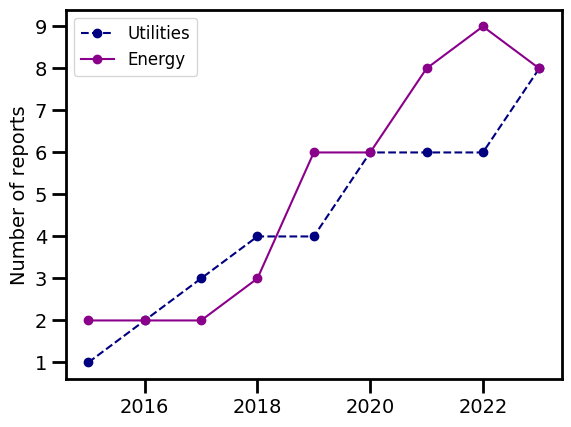

In [41]:
plt.plot(range(2015, 2024), [len(utilitites_texts[year].keys()) for year in utilitites_texts.keys()], marker='o', c='navy', label='Utilities', linestyle='--')
plt.plot(range(2015, 2024), [len(energy_texts[year].keys()) for year in energy_texts.keys()], marker='o', c='darkmagenta', label='Energy', linestyle='-')
plt.ylabel('Number of reports', fontsize=14)
plt.legend(fontsize=12)
plt.show()

## Binary analysis

In [29]:
utilitites_bi={}
for key in tqdm(utilitites_texts.keys()):
    s_keys=list(utilitites_texts[key].keys())
    n_docs=len(s_keys)
    aux=np.zeros((n_docs, L_SDGS), dtype=int)
    for i, s_key in enumerate(tqdm(s_keys, leave=False)):
        aux[i]=text2vec(utilitites_texts[key][s_key])
    utilitites_bi[key]=aux
    

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

In [30]:
[np.sum(np.sum(utilitites_bi[key], axis=0)>0) for key in utilitites_bi.keys()]

[15, 15, 15, 16, 16, 15, 16, 16, 17]

Not all SDGs are covered at least one time in each report.

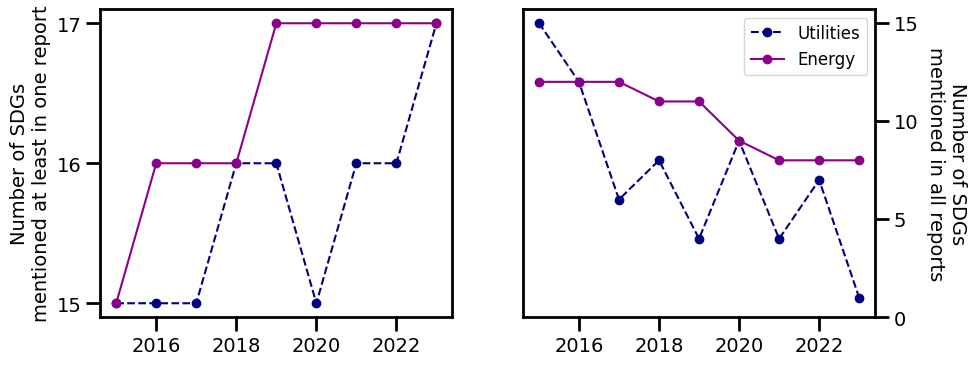

In [47]:
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axs[0].plot(range(2015, 2024), [np.sum(np.sum(utilitites_bi[key], axis=0)>0) for key in utilitites_bi.keys()], marker='o', c='navy', label='Utilities', linestyle='--')
axs[0].plot(range(2015, 2024), [np.sum(np.sum(energy_bi[key], axis=0)>0) for key in energy_bi.keys()], marker='o', c='darkmagenta', label='Energy', linestyle='-')
axs[0].set_ylabel('Number of SDGs\nmentioned at least in one report', fontsize=14)
axs[0].set_yticks(np.arange(15, 18, dtype=int))

axs[1].plot(range(2015, 2024), [np.sum(np.sum(utilitites_bi[key], axis=0)==utilitites_bi[key].shape[0]) for key in utilitites_bi.keys()], marker='o', c='navy', label='Utilities', linestyle='--')
axs[1].plot(range(2015, 2024), [np.sum(np.sum(energy_bi[key], axis=0)==energy_bi[key].shape[0]) for key in energy_bi.keys()], marker='o', c='darkmagenta', label='Energy', linestyle='-')
axs[1].set_ylabel('Number of SDGs\nmentioned in all reports', fontsize=14, rotation=270, labelpad=35)
axs[1].set_yticks(np.arange(0, 18, 5, dtype=int))
axs[1].yaxis.tick_right()
axs[1].yaxis.set_label_position("right")

plt.legend(fontsize=12)
plt.show()

# Save me

In [48]:
text_dict={'Energy': energy_texts, 'Utilities': utilitites_texts}
with open ('./data/energy_utilities_texts.pickle', 'wb') as f:
    pickle.dump(text_dict, f)

In [49]:
binary_dict={'Energy': energy_bi, 'Utilities': utilitites_bi}
with open ('./data/energy_utilities_binary.pickle', 'wb') as f:
    pickle.dump(binary_dict, f)

# Where to go next?

I fear that the statistical validation is not that relevant, due to the limited dimension of the matrices: at most we have a 8x17 matrix. May it be interesting to validate the bipartite matrix of all years altogether? Even in this case, the matrices will be quite small. For the moment let us leave those (ugly) plots here.